In [1]:


import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df = df[df['Species'] != 0][['sepal width (cm)','petal width (cm)','Species']]

In [3]:
df.head()

,sepal width (cm),petal width (cm),Species
50,3.2,1.4,1
51,3.2,1.5,1
52,3.1,1.5,1
53,2.3,1.3,1
54,2.8,1.5,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

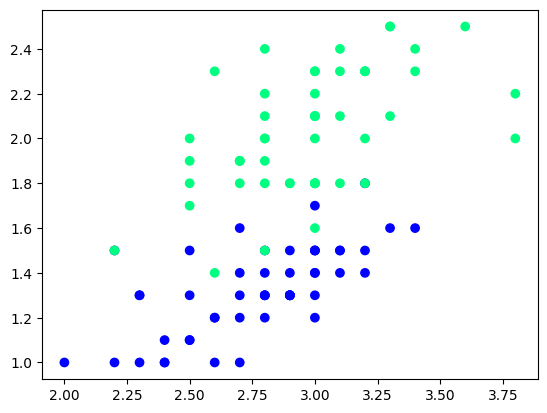

In [7]:
plt.scatter(df['sepal width (cm)'],df['petal width (cm)'],c=df['Species'],cmap='winter')

In [8]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal width (cm),Species
93,2.3,1.0,1
85,3.4,1.6,1
87,2.3,1.3,1
95,3.0,1.2,1
63,2.9,1.4,1
78,2.9,1.5,1
76,2.8,1.4,1
65,3.1,1.4,1
82,2.7,1.2,1
73,2.8,1.2,1


In [9]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [10]:
df_train

,sepal width (cm),petal width (cm),Species
61,3.0,1.5,1
105,3.0,2.1,2
107,2.9,1.8,2
114,2.8,2.4,2
90,2.6,1.2,1
78,2.9,1.5,1
138,3.0,1.8,2
144,3.3,2.5,2
68,2.2,1.5,1
80,2.4,1.1,1


In [11]:
df_val

,sepal width (cm),petal width (cm),Species
66,3.0,1.5,1
127,3.0,1.8,2
50,3.2,1.4,1
143,3.2,2.3,2
73,2.8,1.2,1


In [12]:
df_test

,sepal width (cm),petal width (cm),Species
108,2.5,1.8,2
104,3.0,2.2,2
118,2.6,2.3,2
62,2.2,1.0,1
128,2.8,2.1,2


In [13]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [14]:
y_test

array([1, 2, 1, 2, 1])

# Case 1 - Bagging

In [15]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal width (cm),Species
144,3.3,2.5,2
90,2.6,1.2,1
61,3.0,1.5,1
90,2.6,1.2,1
90,2.6,1.2,1
138,3.0,1.8,2
107,2.9,1.8,2
138,3.0,1.8,2


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [17]:
dt_bag1 = DecisionTreeClassifier()

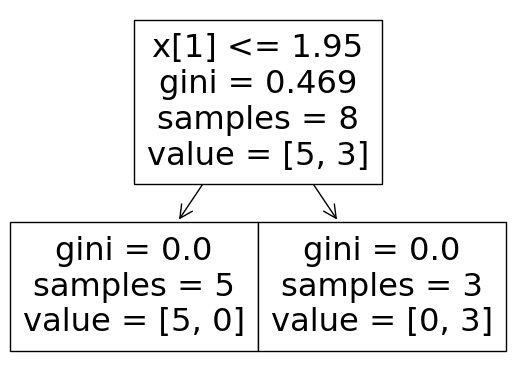

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


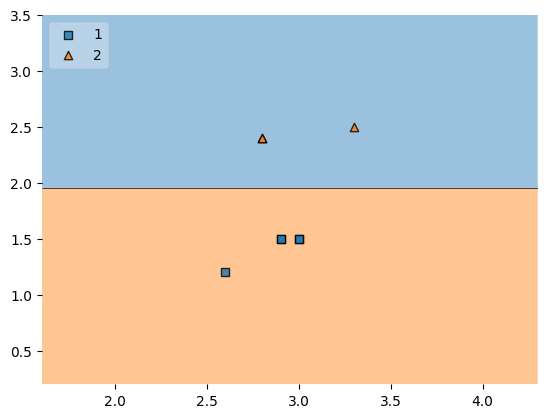

In [25]:
evaluate(dt_bag1,X,y)

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal width (cm),Species
114,2.8,2.4,2
144,3.3,2.5,2
107,2.9,1.8,2
90,2.6,1.2,1
68,2.2,1.5,1
78,2.9,1.5,1
114,2.8,2.4,2
114,2.8,2.4,2


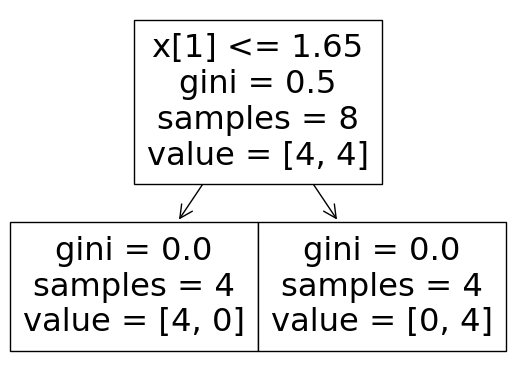

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


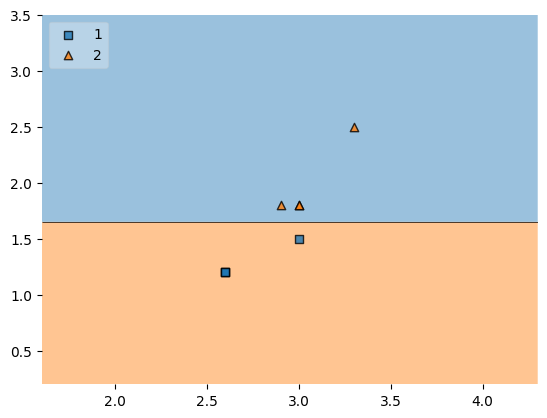

In [20]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [21]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal width (cm),Species
90,2.6,1.2,1
78,2.9,1.5,1
144,3.3,2.5,2
78,2.9,1.5,1
114,2.8,2.4,2
61,3.0,1.5,1
61,3.0,1.5,1
114,2.8,2.4,2


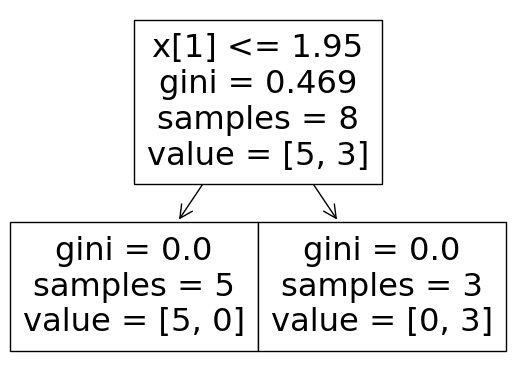

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


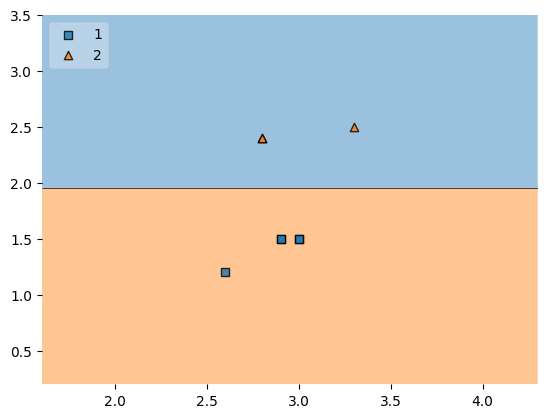

In [22]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [27]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


## Predict

In [23]:
df_test

,sepal width (cm),petal width (cm),Species
108,2.5,1.8,2
104,3.0,2.2,2
118,2.6,2.3,2
62,2.2,1.0,1
128,2.8,2.1,2


In [28]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [29]:
# Row sampling without replacement
df_train

,sepal width (cm),petal width (cm),Species
61,3.0,1.5,1
105,3.0,2.1,2
107,2.9,1.8,2
114,2.8,2.4,2
90,2.6,1.2,1
78,2.9,1.5,1
138,3.0,1.8,2
144,3.3,2.5,2
68,2.2,1.5,1
80,2.4,1.1,1


In [30]:
df_train.sample(8)

,sepal width (cm),petal width (cm),Species
107,2.9,1.8,2
144,3.3,2.5,2
80,2.4,1.1,1
78,2.9,1.5,1
114,2.8,2.4,2
90,2.6,1.2,1
61,3.0,1.5,1
138,3.0,1.8,2


# Random Subspaces

In [33]:
iris = datasets.load_iris()
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1['Species'] = iris.target

encoder = LabelEncoder()
df1['Species'] = encoder.fit_transform(df1['Species'])
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df1.sample(2,replace=True,axis=1)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Random Patches

In [35]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,sepal length (cm)
13,0,4.3
85,1,6.0
38,0,4.4
73,1,6.1
88,1,5.6
75,1,6.6
121,2,5.6
38,0,4.4
